# import the basic required library

'''
The datasets consist of several independent variables include:

1. Car_Name --> Name of cars
2. Year --> car purchased year
3. Selling_Price --> car sold price in mentioned year
4. Present_Price --> car price in year 2020
5. Kms_Driven --> km's driven of the car
6. Fuel_Type --> is CNG, PETROL or DIESAL
7. Seller_Type --> Owner or Dealer
8. Transmission --> Manual or Automatic
9. Owner

We are going to use some of the variables which we need for regression models.
'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

# reading the dataset using pandas dataframe

In [2]:
df=pd.read_csv("car_data.csv")

In [3]:
'to check if dataset is imported properly or not'
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

# to check null values present or not in dataset

In [5]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# using 'info' we get data types of features

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# 'describe' works on 'int' or 'float' datatypes

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# to check the unique values of datatype object

In [8]:
print(df['Fuel_Type'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [9]:
print(df['Seller_Type'].value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [10]:
print(df['Transmission'].value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [11]:
df.shape

(301, 9)

# performing EDA and data visualization

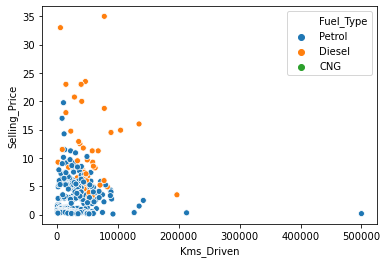

In [12]:
sns.scatterplot(data=df, x='Kms_Driven', y='Selling_Price',hue='Fuel_Type')

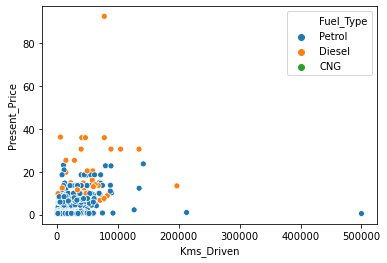

In [13]:
sns.scatterplot(data=df, x='Kms_Driven', y='Present_Price',hue='Fuel_Type')

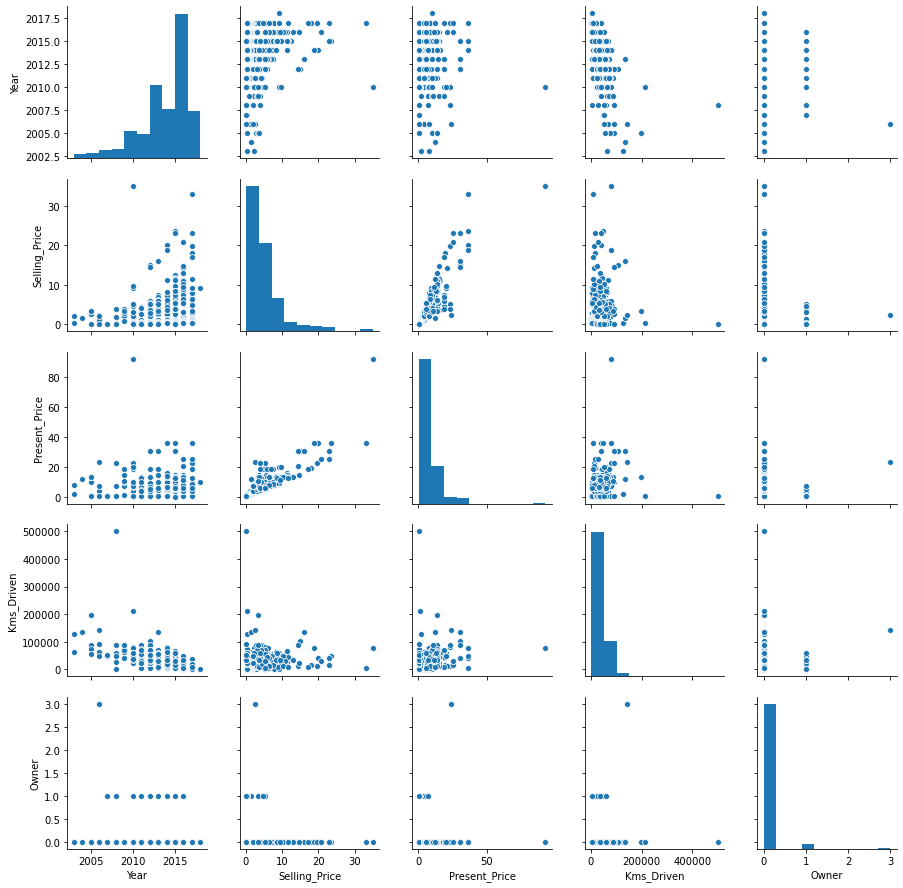

In [14]:
sns.pairplot(df)

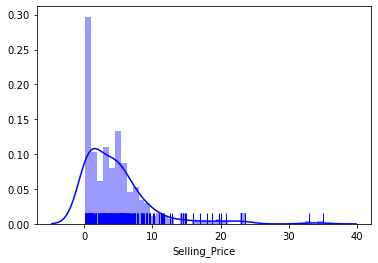

In [15]:
# df['Selling_Price'].hist()
sns.distplot(df['Selling_Price'],kde=True, rug=True,color='blue',bins=40)

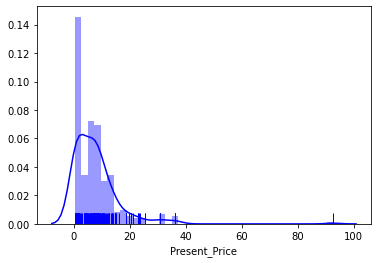

In [16]:
# df['Selling_Price'].hist()
sns.distplot(df['Present_Price'],kde=True, rug=True,color='blue',bins=40)

In [17]:
df['Current_year']=2020

In [18]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [19]:
df['Car_Age']=df['Current_year']-df['Year']

In [20]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [21]:
df.drop(['Year', 'Current_year'], axis=1, inplace=True)

In [22]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


# corelation matrix

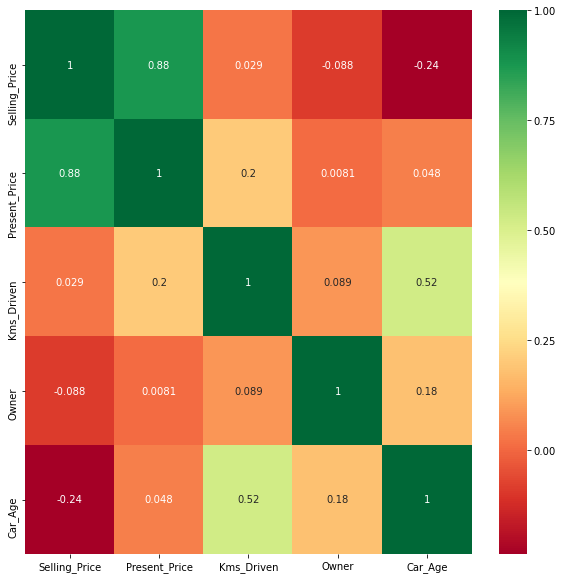

In [23]:
plt.figure(figsize=(10,10))
corr=df.corr()
#top_corr_features = corr.index
sns.heatmap(corr,annot=True,cmap='RdYlGn')
plt.show()

# encoding categorical values into numbers

In [24]:
LE=LabelEncoder()

In [25]:
df['Fuel_Type_encoded']=LE.fit_transform(df['Fuel_Type'])

In [26]:
df['Seller_Type_encoded']=LE.fit_transform(df['Seller_Type'])
df['Transmission_encoded']=LE.fit_transform(df['Transmission'])

df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age,Fuel_Type_encoded,Seller_Type_encoded,Transmission_encoded
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6,2,0,1
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7,1,0,1
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3,2,0,1
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9,2,0,1
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6,1,0,1


In [27]:
df.drop(['Fuel_Type', 'Seller_Type', 'Transmission'], axis=1 ,inplace=True)

In [28]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_encoded,Seller_Type_encoded,Transmission_encoded
0,ritz,3.35,5.59,27000,0,6,2,0,1
1,sx4,4.75,9.54,43000,0,7,1,0,1
2,ciaz,7.25,9.85,6900,0,3,2,0,1
3,wagon r,2.85,4.15,5200,0,9,2,0,1
4,swift,4.60,6.87,42450,0,6,1,0,1


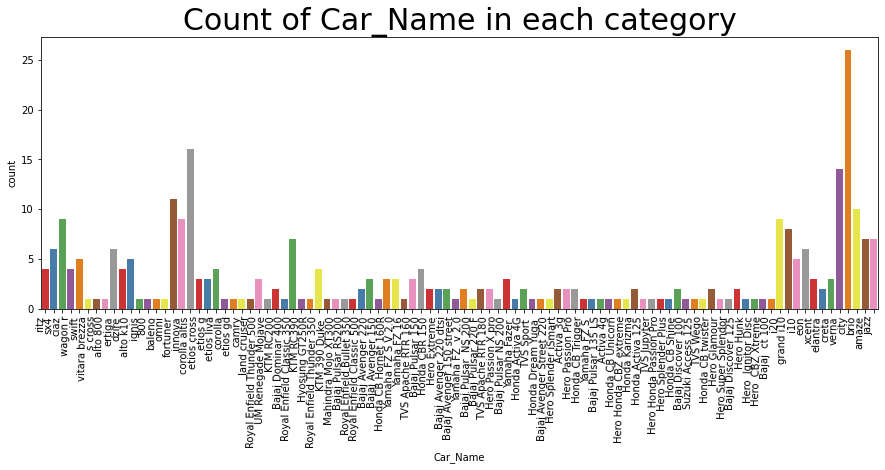

In [29]:
plt.figure(figsize=(15,5))
g=sns.countplot(x="Car_Name",data=df, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=89, ha="right")
plt.title('Count of Car_Name in each category',size = 30)
plt.show()

In [30]:
df.drop(['Car_Name'], axis=1 ,inplace=True)

In [31]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_encoded,Seller_Type_encoded,Transmission_encoded
0,3.35,5.59,27000,0,6,2,0,1
1,4.75,9.54,43000,0,7,1,0,1
2,7.25,9.85,6900,0,3,2,0,1
3,2.85,4.15,5200,0,9,2,0,1
4,4.60,6.87,42450,0,6,1,0,1


# finding features and target in dataset

In [32]:
features=df.drop(['Selling_Price'], axis=1)
target=df.Selling_Price

In [33]:
features.head()

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_encoded,Seller_Type_encoded,Transmission_encoded
0,5.59,27000,0,6,2,0,1
1,9.54,43000,0,7,1,0,1
2,9.85,6900,0,3,2,0,1
3,4.15,5200,0,9,2,0,1
4,6.87,42450,0,6,1,0,1


In [34]:
target.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

# feature importance

In [35]:
from sklearn.ensemble import ExtraTreesRegressor
ETR=ExtraTreesRegressor()
ETR.fit(features,target)

C:\Users\AKSHAY\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [36]:
print(ETR.feature_importances_)

[3.30118916e-01 4.96906990e-02 2.22536554e-04 7.93930373e-02
 1.73510000e-01 2.78540120e-01 8.85246917e-02]


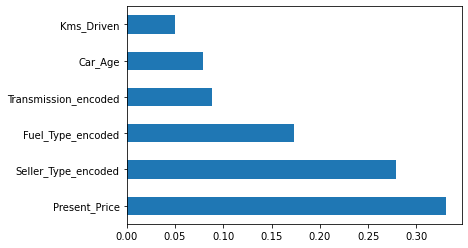

In [37]:
# plot graph for features importance for better importances

Feature_importance=pd.Series(ETR.feature_importances_, index=features.columns)
Feature_importance.nlargest(6).plot(kind='barh')
plt.show()

# spliting data into training and testing parts

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)

In [40]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [41]:
cv=5 # CV value
r_2 = [] # List for r 2 score
mse = [] # mean squared error
CV = [] # list for CV scores mean

# creating a generalized function to build a model and visualize the predictions
this format will reduce our code to build
5 parameters are nedded. they are
1. model name (model which need to be implemented)
2. x_train
3. x_test
4. Y_train
5. Y_test

In this case we will be using:
1. Linear Regression
2. Decision Trees Regressor
3. Random Forest Regressor

In [42]:
def model(model_name,x_train_,x_test_,Y_train_,Y_test_):
    model_name.fit(x_train_,Y_train_)                       # developing a model
    predict=model_name.predict(x_test_)
    prediction=pd.DataFrame(predict)
    R_2=r2_score(Y_test_,prediction)
    MSE=mean_squared_error(Y_test_,prediction)
    cross_val=cross_val_score(model_name,x_train_,Y_train_,cv=cv)
    
    #Appending results to lists
    mse.append(MSE)                                         # Appending the scores which are globally defined
    r_2.append(R_2)
    CV.append(cross_val.mean())
    
    #printing results
    print('model_name {}'.format(model_name), "\n")        # printing the results
    print('r2_score: {}'.format(R_2), "\n")
    print('mean sq. error: {}'.format(MSE), "\n")
    print('cv scores: {}'.format(cross_val), "\n")
    print("CV scores mean:",cross_val.mean())
    
    # for plotting graphs:
    test_index=Y_test_.reset_index()["Selling_Price"]
    ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
    ax=prediction[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
    plt.legend(loc='upper right')
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()
    
    #ploting using distplot graph
    #plt.scatter(Y_test_, predict)
    sns.distplot(Y_test_-predict)
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()

# Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

model_name LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) 

r2_score: 0.8468053957657442 

mean sq. error: 3.5289272538906125 

cv scores: [0.86919873 0.83675306 0.78691423 0.82956809 0.90042738] 

CV scores mean: 0.8445722987119781


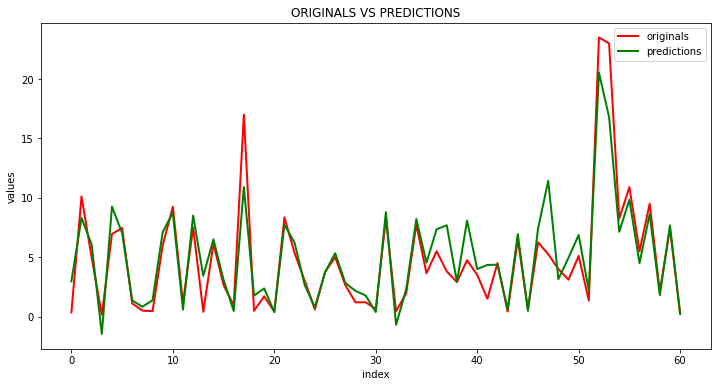

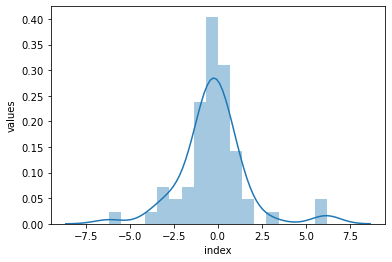

In [44]:
model(lr, X_train,X_test,y_train,y_test)

# decision Trees regressor

In [45]:
# predictions using Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()

model_name DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') 

r2_score: 0.9470667853073327 

mean sq. error: 1.2193475409836065 

cv scores: [0.93480616 0.78613991 0.65720179 0.90128215 0.92724263] 

CV scores mean: 0.8413345275586155


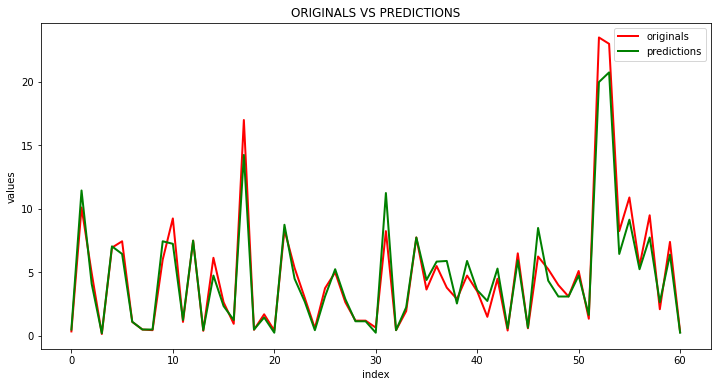

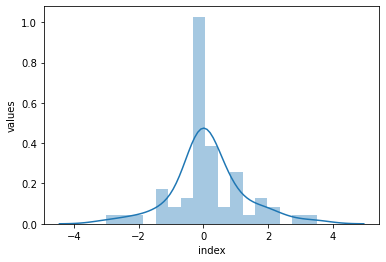

In [46]:
model(DT,X_train,X_test,y_train,y_test)

# Random forest regresorr and hyperparameter tuning

In [47]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()

In [48]:
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=10)]
max_features=['auto', 'sqrt']
max_depth=[int(x) for x in np.linspace(5, 30, num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [49]:
random_grid={'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf
            }

In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
print(random_grid)

{'n_estimators': [100, 222, 344, 466, 588, 711, 833, 955, 1077, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [52]:
RSCV=RandomizedSearchCV(estimator=RFR, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10,cv=5, random_state=42, verbose=2,n_jobs=1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.1s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=588, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=588, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.4s
[CV] n_estimators=588, min_samples_split=100, mi

[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=344, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=344, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.2s
[CV] n_estimators=344, min_samples_split=15, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   27.8s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=588, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=588, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=588, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=588, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=588, min_samples_split=100

[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=344, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=344, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.3s
[CV] n_estimators=344, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=344, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.1s
[CV] n_estimators=344, min_samples_split=15, min

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   28.1s finished
C:\Users\AKSHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=588, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=588, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=588, min_samples_split=100, mi

[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=344, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=344, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.2s
[CV] n_estimators=344, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=344, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.2s
[CV] n_estimators=344, min_samples_split=15, min

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   29.6s finished
C:\Users\AKSHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=588, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=588, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=588, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=588, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=588, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=588, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=588, min_samples_split

[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=344, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=344, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.2s
[CV] n_estimators=344, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=344, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.2s
[CV] n_estimators=344, min_samples_split=15, min

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   28.5s finished
C:\Users\AKSHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.1s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.1s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=588, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=588, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=588, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=588, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=588, min_samples_split=100

[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=344, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=344, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.2s
[CV] n_estimators=344, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=344, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.2s
[CV] n_estimators=344, min_samples_split=15, min

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   25.8s finished
C:\Users\AKSHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.1s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=588, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=588, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=588, min_samples_split=100, mi

[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=344, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=344, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.1s
[CV] n_estimators=344, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=344, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.2s
[CV] n_estimators=344, min_samples_split=15, min

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   26.5s finished
C:\Users\AKSHAY\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


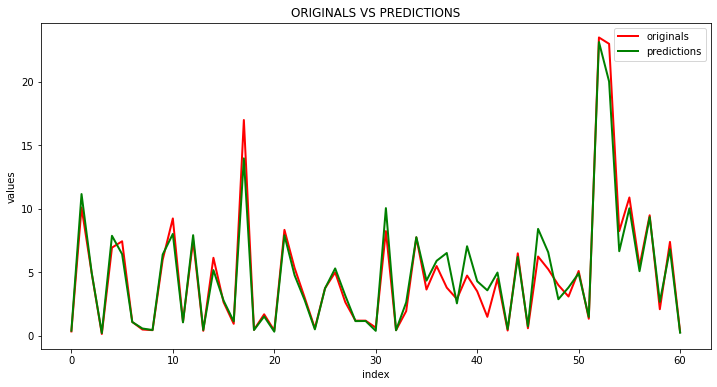

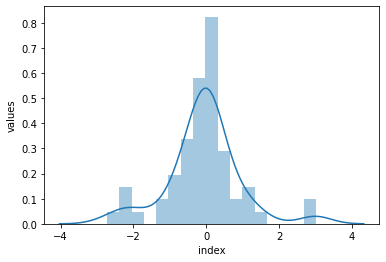

In [53]:
model(RSCV, X_train,X_test,y_train,y_test)